In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/gdrive')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Trainity Assignments/Trainity Assignment - 7/Car_data.csv")

In [5]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [7]:
# function to get null value
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [8]:
# get missign values of all columns
NA_col = column_wise_null_percentage(data)
NA_col

Make                  0.00
Model                 0.00
Year                  0.00
Engine Fuel Type      0.03
Engine HP             0.58
Engine Cylinders      0.25
Transmission Type     0.00
Driven_Wheels         0.00
Number of Doors       0.05
Market Category      31.41
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64

In [9]:
data.index

RangeIndex(start=0, stop=11914, step=1)

In [10]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [11]:
#No of duplicate Rows
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (715, 16)


In [12]:
# dropping duplicate rows
data = data.drop_duplicates()

In [13]:
#Calculating Missing values
print(data.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [14]:
# dropping the values
data = data.dropna()            
data.count()

Make                 7735
Model                7735
Year                 7735
Engine Fuel Type     7735
Engine HP            7735
Engine Cylinders     7735
Transmission Type    7735
Driven_Wheels        7735
Number of Doors      7735
Market Category      7735
Vehicle Size         7735
Vehicle Style        7735
highway MPG          7735
city mpg             7735
Popularity           7735
MSRP                 7735
dtype: int64

In [15]:
#after dropping the values
print(data.isnull().sum())       

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [16]:
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print('\n')

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']
47


Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class']
713


Year
[2011 2012 2013 1992 1993]
28


Engine Fuel Type
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel']
8


Engine HP
[335. 300. 230. 320. 172.]
327


Engine Cylinders
[ 6.  4.  5.  8. 12.]
9


Transmission Type
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
5


Driven_Wheels
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4


Number of Doors
[2. 4. 3.]
3


Market Category
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance']
70


Vehicle Size
['Compact' 'Midsize' 'Large']
3


Vehicle Style
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback']
16


highway MPG
[26 28 27 25 24]
44


city mpg
[19 20 18 17 16]
50


Popularity
[3916 3105  819  617 1013]
47


MSRP
[46135 40650 36350 29

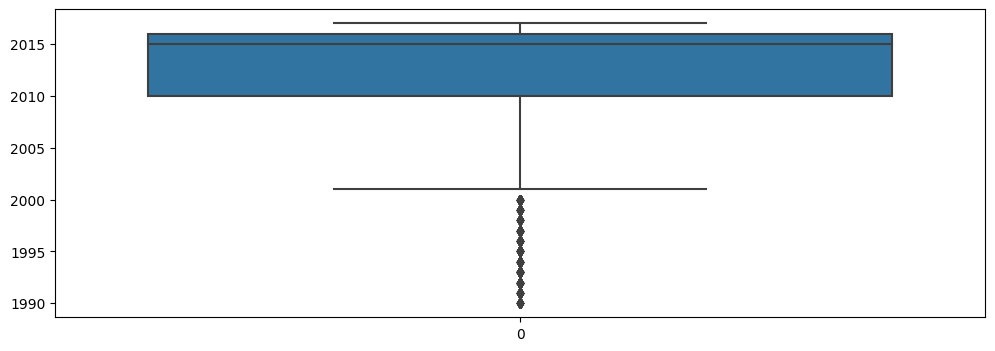

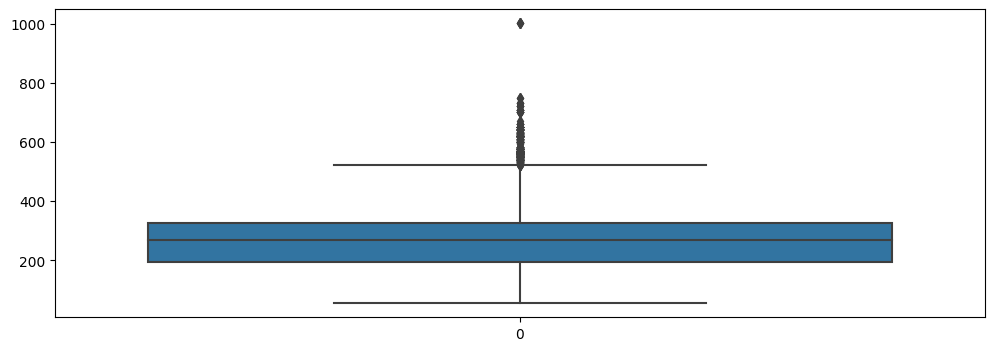

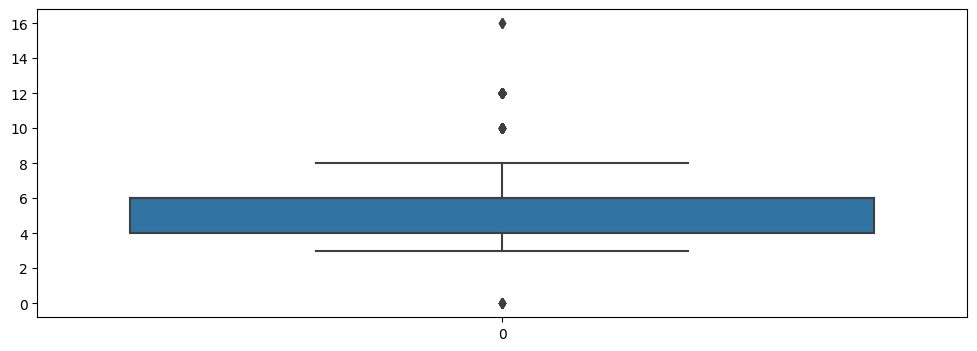

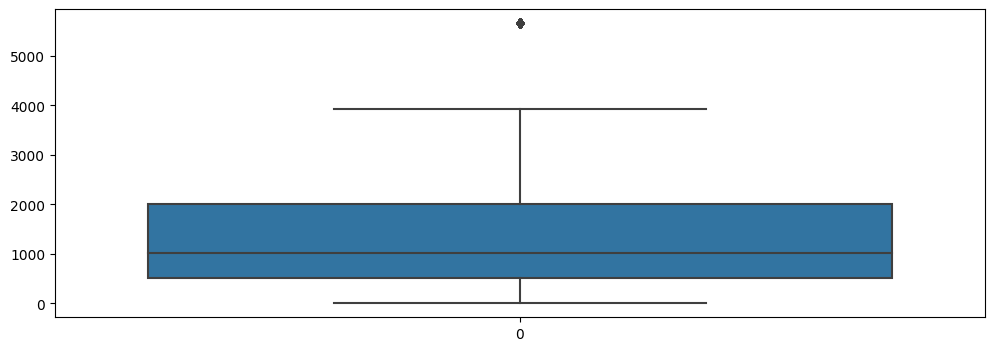

In [17]:
# Box plot for all variables for outlier detection
plt.figure(figsize=(12,4))
sns.boxplot(data['Year'])
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data['Engine HP'])
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data['Engine Cylinders'])
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data['Popularity'])
plt.show()

<ipython-input-18-ac065ee9baaa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = data.corr()


<Axes: >

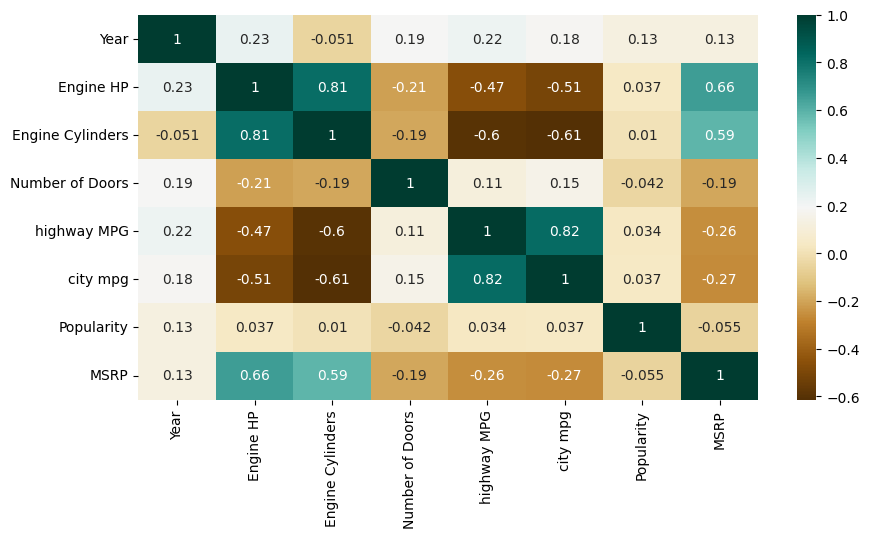

In [18]:
plt.figure(figsize=(10,5))
c = data.corr()
sns.heatmap(c, cmap="BrBG", annot=True )

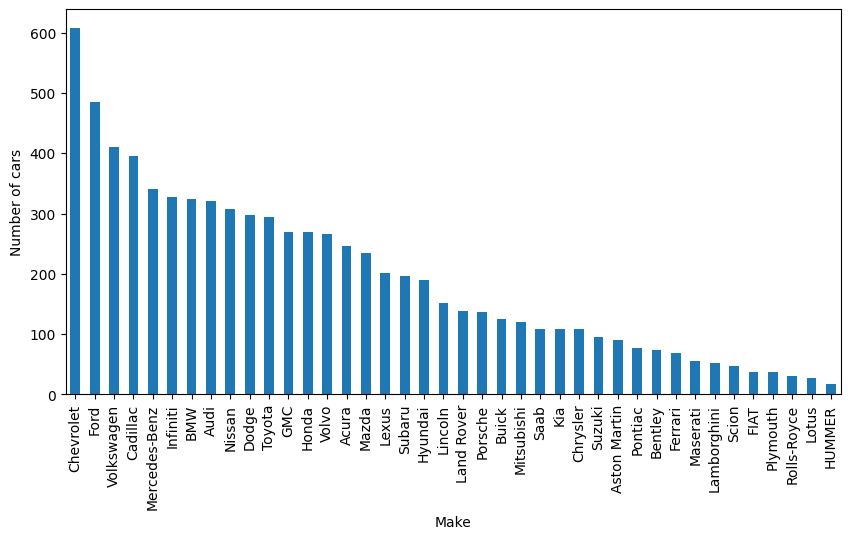

In [19]:
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.ylabel('Number of cars')
plt.xlabel('Make');

In [20]:
grouped_df = data.groupby('Market Category')

In [21]:
car_model_counts = grouped_df['Model'].count()
popularity_scores = grouped_df['Popularity'].mean()
result_df = pd.DataFrame({'Car Model Count': car_model_counts, 'Popularity Score': popularity_scores})
result_df

,Car Model Count,Popularity Score
Market Category,,
Crossover,1068,1539.475655
"Crossover,Diesel",7,873.000000
"Crossover,Exotic,Luxury,High-Performance",1,238.000000
"Crossover,Exotic,Luxury,Performance",1,238.000000
"Crossover,Factory Tuner,Luxury,High-Performance",26,1823.461538
...,...,...
"Luxury,Hybrid",48,724.687500
"Luxury,Performance",659,1293.062215
"Luxury,Performance,Hybrid",11,2333.181818


To Determine : How does the popularity of a car model vary across different market categories? <br>
Task 1.A: Create a pivot table that shows the number of car models in each market category and their corresponding popularity scores.<br>
Task 1.B: Create a combo chart that visualizes the relationship between market category and popularity.

In [22]:
# Create the pivot table
pivot_table = data.pivot_table(index='Market Category', values='Model', aggfunc='count', margins=True, margins_name='Total')
pivot_table.columns = ['CarModelCount']

# Add popularity scores to the pivot table
popularity_scores = data.groupby('Market Category')['Popularity'].mean()
pivot_table['Popularity'] = popularity_scores

# Display the pivot table
print(pivot_table)

                                                 CarModelCount   Popularity
Market Category                                                            
Crossover                                                 1068  1539.475655
Crossover,Diesel                                             7   873.000000
Crossover,Exotic,Luxury,High-Performance                     1   238.000000
Crossover,Exotic,Luxury,Performance                          1   238.000000
Crossover,Factory Tuner,Luxury,High-Performance             26  1823.461538
...                                                        ...          ...
Luxury,Performance                                         659  1293.062215
Luxury,Performance,Hybrid                                   11  2333.181818
Performance                                                503  1443.234592
Performance,Hybrid                                           1   155.000000
Total                                                     7735          NaN

[71 rows x 

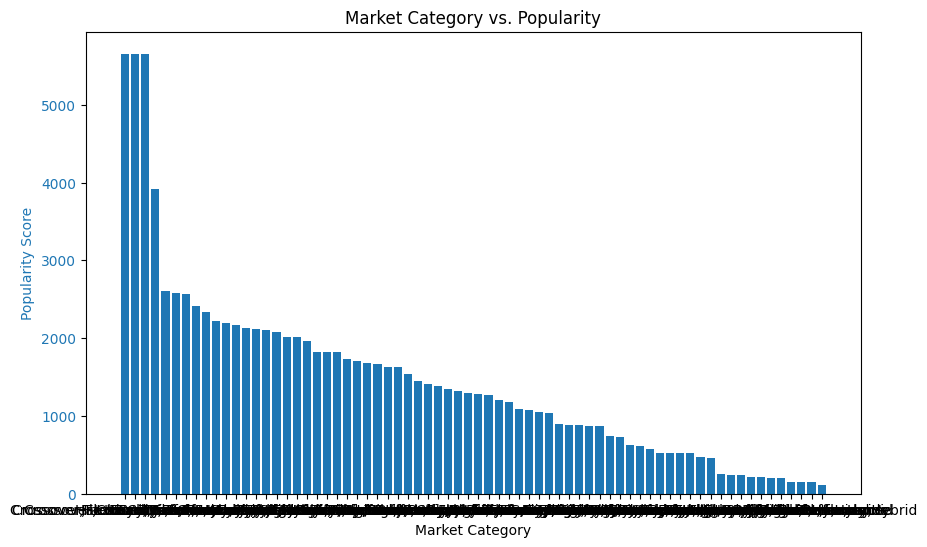

In [23]:
# Calculate the average popularity scores for each market category
popularity_scores = data.groupby('Market Category')['Popularity'].mean().reset_index()

# Sort the data by popularity score in descending order
sorted_df = popularity_scores.sort_values('Popularity', ascending=False)

# Create the combo chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for popularity scores
ax1.bar(sorted_df['Market Category'], sorted_df['Popularity'], color='tab:blue')
ax1.set_xlabel('Market Category')
ax1.set_ylabel('Popularity Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Set title and display the chart
plt.title('Market Category vs. Popularity')
plt.show()

To Determine : What is the relationship between a car's engine power and its price?<br><br>


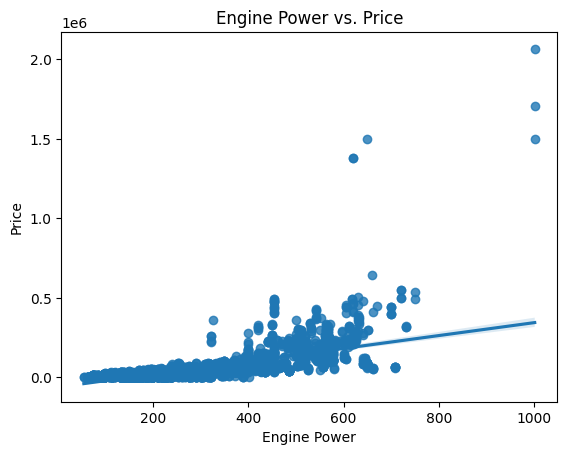

In [24]:
sns.regplot(data=data, x='Engine HP', y='MSRP')

# Set labels and title
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.title('Engine Power vs. Price')

# Display the chart
plt.show()

To Determine : Which car features are most important in determining a car's price? 


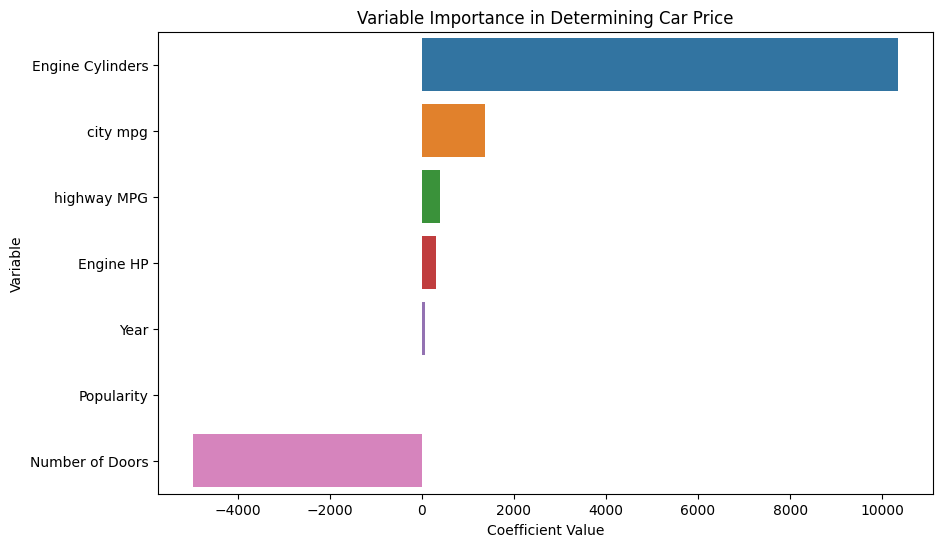

In [25]:
dataa=data.copy()
# Filter relevant columns with intergral values
relevant_columns = ['MSRP', 'Popularity', 'city mpg', 'highway MPG', 'Number of Doors', 'Engine Cylinders', 'Engine HP', 'Year']
filtered_df = dataa[relevant_columns].dropna()

# Split the data into predictor variables (X) and the target variable (y)
X = filtered_df.drop('MSRP', axis=1)
y = filtered_df['MSRP']

# Perform linear regression
regression = LinearRegression()
regression.fit(X, y)

# Get the coefficient values for each variable
coefficient_values = pd.Series(regression.coef_, index=X.columns).sort_values(ascending=False)

# Create a bar chart to visualize the coefficient values
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficient_values.values, y=coefficient_values.index, orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.title('Variable Importance in Determining Car Price')

# Display the chart
plt.show()

To Determine : How does the average price of a car vary across different manufacturers?


In [26]:
pivot_table = data.pivot_table(index='Make', values='MSRP', aggfunc='mean')

# Display the pivot table
print(pivot_table)

                       MSRP
Make                       
Acura          3.508749e+04
Alfa Romeo     6.160000e+04
Aston Martin   1.981235e+05
Audi           5.457412e+04
BMW            6.216256e+04
Bentley        2.471693e+05
Bugatti        1.757224e+06
Buick          3.377040e+04
Cadillac       5.636827e+04
Chevrolet      3.597082e+04
Chrysler       2.997887e+04
Dodge          3.118680e+04
FIAT           2.237066e+04
Ferrari        2.373838e+05
Ford           3.363895e+04
GMC            3.738575e+04
Genesis        4.661667e+04
HUMMER         3.646441e+04
Honda          2.697087e+04
Hyundai        2.727432e+04
Infiniti       4.264027e+04
Kia            3.014931e+04
Lamborghini    3.315673e+05
Land Rover     6.806709e+04
Lexus          4.754907e+04
Lincoln        4.356001e+04
Lotus          6.837714e+04
Maserati       1.136845e+05
Maybach        5.462219e+05
Mazda          2.324791e+04
McLaren        2.398050e+05
Mercedes-Benz  7.213503e+04
Mitsubishi     2.035282e+04
Nissan         3.290

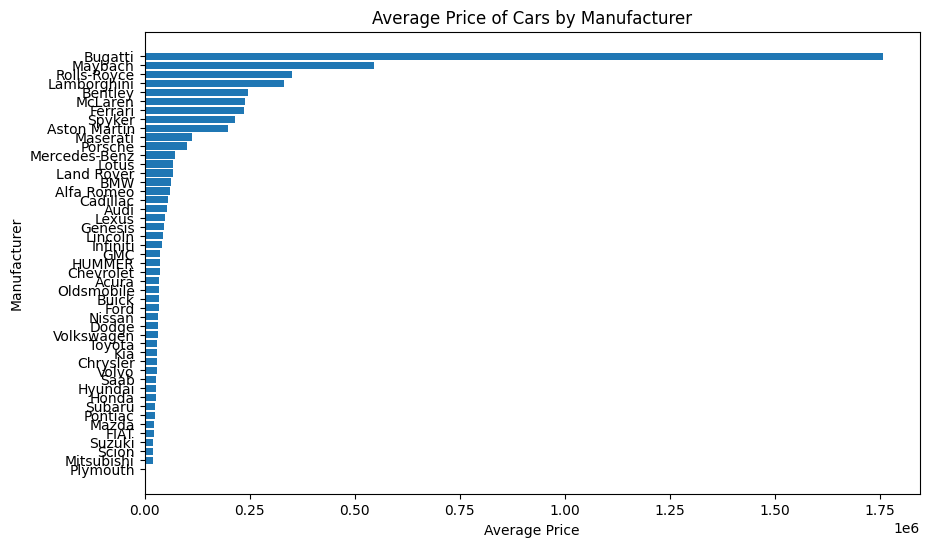

In [27]:
# Calculate the average price for each manufacturer
average_prices = data.groupby('Make')['MSRP'].mean().reset_index()

# Sort the data by average price in ascending order
sorted_df = average_prices.sort_values('MSRP', ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_df['Make'], sorted_df['MSRP'], color='tab:blue')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.title('Average Price of Cars by Manufacturer')

# Display the chart
plt.show()


To Determine : What is the relationship between fuel efficiency and the number of cylinders in a car's engine?


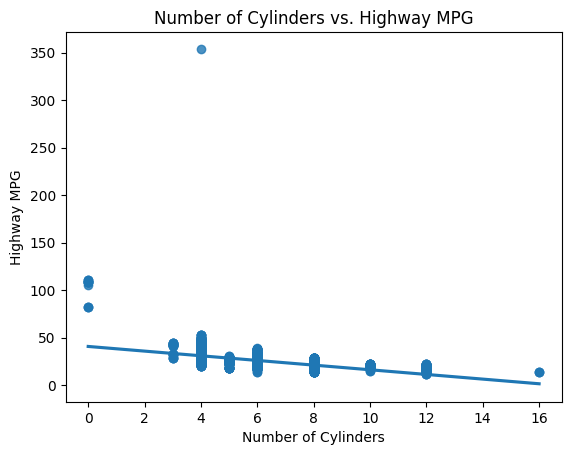

Correlation Coefficient: -0.5978637854779184


In [28]:
# Filter relevant columns
relevant_columns = ['Engine Cylinders', 'highway MPG']
filtered_df = data[relevant_columns]

# Create a scatter plot with a trendline
sns.regplot(data=filtered_df, x='Engine Cylinders', y='highway MPG')

# Set labels and title
plt.xlabel('Number of Cylinders')
plt.ylabel('Highway MPG')
plt.title('Number of Cylinders vs. Highway MPG')

# Display the chart
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = filtered_df['Engine Cylinders'].corr(filtered_df['highway MPG'])

# Display the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

To Determine : How does the distribution of car prices vary by brand and body style?



In [29]:
# Create pivot tables for total MSRP by brand and body style
pivot_brand1 = data.pivot_table(index='Make', columns='Vehicle Style', values='MSRP', aggfunc='sum', fill_value=0)

# Display the pivot tables
print("Total MSRP by Brand:")
print(pivot_brand1)

Total MSRP by Brand:
Vehicle Style  2dr Hatchback  2dr SUV  4dr Hatchback  4dr SUV  Cargo Minivan  \
Make                                                                           
Acura                 480917        0         357440  2663505              0   
Alfa Romeo                 0        0              0        0              0   
Aston Martin               0        0              0        0              0   
Audi                    4000        0              0  2674900              0   
BMW                    80097        0        1103100  3160950              0   
Bentley                    0        0              0        0              0   
Bugatti                    0        0              0        0              0   
Buick                      0        0              0  1944095              0   
Cadillac                   0        0              0  7182555              0   
Chevrolet               8000        0        1209735  5061440          45185   
Chrysler           

<Figure size 1000x600 with 0 Axes>

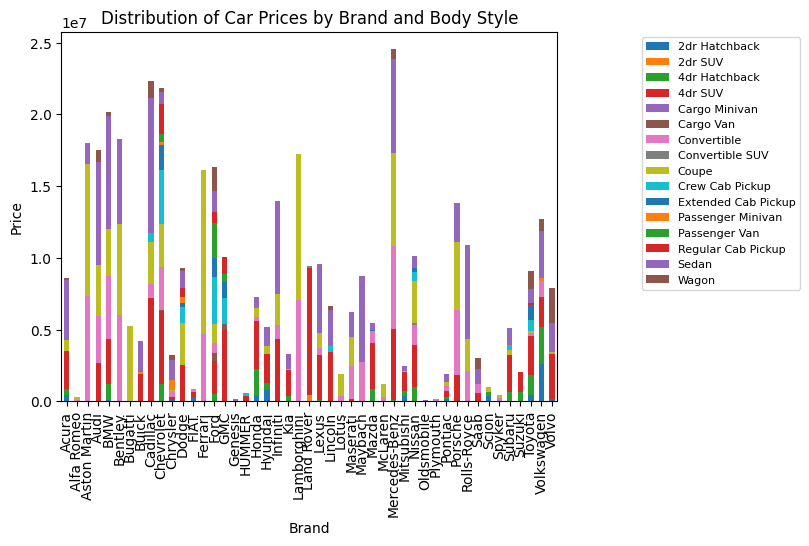

In [30]:
# Create the stacked column chart
plt.figure(figsize=(10, 6))
pivot_brand1.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Distribution of Car Prices by Brand and Body Style')
plt.legend(loc='upper right',markerscale=0.5, fontsize=8,bbox_to_anchor=(1.5, 1))

# Display the chart
plt.show()

To Determine : Which car brands have the highest and lowest average MSRPs, and how does this vary by body style?


In [31]:
# Create pivot tables for average MSRP by brand and body style
pivot_brand2 = data.pivot_table(index='Make', columns='Vehicle Style', values='MSRP', aggfunc='mean',fill_value=0)
# Display the pivot tables
print("Average MSRP by Brand:")
print(pivot_brand2)

Average MSRP by Brand:
Vehicle Style  2dr Hatchback  2dr SUV  4dr Hatchback       4dr SUV  \
Make                                                                 
Acura           17175.607143      0.0   51062.857143  42959.758065   
Alfa Romeo          0.000000      0.0       0.000000      0.000000   
Aston Martin        0.000000      0.0       0.000000      0.000000   
Audi             2000.000000      0.0       0.000000  48634.545455   
BMW             26699.000000      0.0   55155.000000  58536.111111   
Bentley             0.000000      0.0       0.000000      0.000000   
Bugatti             0.000000      0.0       0.000000      0.000000   
Buick               0.000000      0.0       0.000000  34106.929825   
Cadillac            0.000000      0.0       0.000000  72551.060606   
Chevrolet        2000.000000      0.0   18329.318182  38055.939850   
Chrysler        32935.000000      0.0       0.000000  36372.000000   
Dodge            2000.000000      0.0    2000.000000  31175.632911 

<Figure size 1000x600 with 0 Axes>

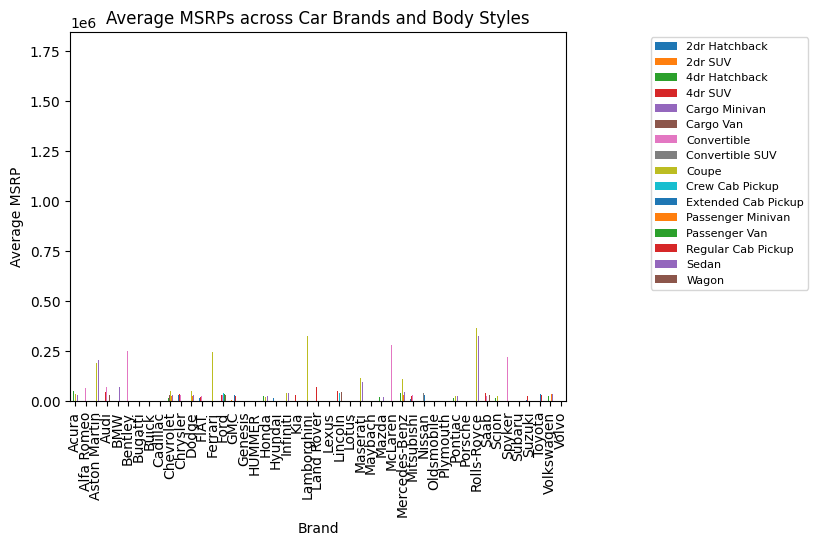

In [32]:
#Create the clustered column chart
plt.figure(figsize=(10, 6))
pivot_brand2.plot(kind='bar')

# Set labels and title
plt.xlabel('Brand')
plt.ylabel('Average MSRP')
plt.title('Average MSRPs across Car Brands and Body Styles')
plt.legend(loc='upper right',markerscale=0.5, fontsize=8,bbox_to_anchor=(1.5, 1))

# Display the chart
plt.show()

To Determine : How do the different feature such as transmission type affect the MSRP, and how does this vary by body style?


In [33]:
# Create a pivot table for the average MSRP by transmission type and body style
pivot_table1 = data.pivot_table(index='Transmission Type', columns='Vehicle Style', values='MSRP', aggfunc='mean')

# Display the pivot table
print("Average MSRP by Transmission Type and Body Style: \n")
print(pivot_table1)

Average MSRP by Transmission Type and Body Style: 

Vehicle Style      2dr Hatchback  2dr SUV  4dr Hatchback       4dr SUV  \
Transmission Type                                                        
AUTOMATED_MANUAL    27470.416667      NaN   29347.045455  40451.153846   
AUTOMATIC           20784.099010  35894.5   23888.735294  42971.875755   
DIRECT_DRIVE                 NaN      NaN   34511.923077           NaN   
MANUAL              12840.655556  29222.5   17500.363636  23131.333333   
UNKNOWN              7361.500000      NaN            NaN           NaN   

Vehicle Style      Cargo Minivan     Cargo Van    Convertible  \
Transmission Type                                               
AUTOMATED_MANUAL             NaN           NaN  134527.794872   
AUTOMATIC                22964.0  30724.705882  112168.390438   
DIRECT_DRIVE                 NaN           NaN            NaN   
MANUAL                       NaN           NaN   69716.931159   
UNKNOWN                      NaN       

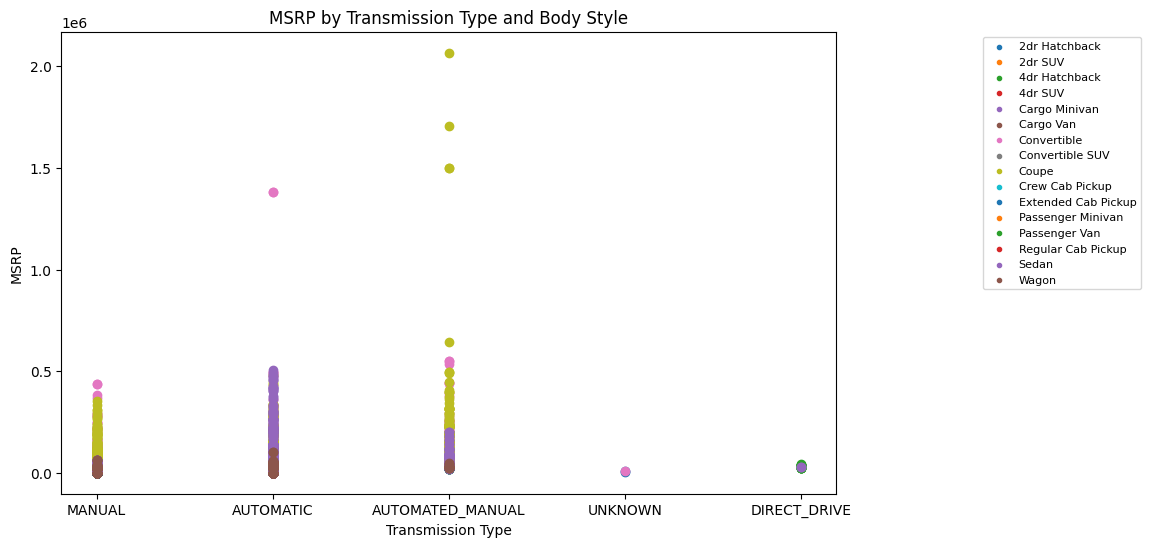

In [40]:
# Create a scatter plot chart
plt.figure(figsize=(10, 6))

# Iterate over each body style
for body_style, group in data.groupby('Vehicle Style'):
  plt.scatter(group['Transmission Type'], group['MSRP'], label=body_style)
# Set labels and title
plt.xlabel('Transmission Type')
plt.ylabel('MSRP')
plt.title('MSRP by Transmission Type and Body Style')
plt.legend(loc='upper right',markerscale=0.5, fontsize=8,bbox_to_anchor=(1.4, 1))

# Display the chart
plt.show()

To Determine : How does the fuel efficiency of cars vary across different body styles and model years? 

In [35]:
# Create a pivot table for the average MPG by body style and model year
pivot_table2 = data.pivot_table(index='Year', columns='Vehicle Style', values='highway MPG', aggfunc='mean')

# Display the pivot table
print("Average MPG by Body Style and Model Year:")
print(pivot_table2)

Average MPG by Body Style and Model Year:
Vehicle Style  2dr Hatchback  2dr SUV  4dr Hatchback    4dr SUV  \
Year                                                              
1990               30.400000      NaN      31.000000        NaN   
1991               29.833333      NaN            NaN        NaN   
1992               29.392857     17.0      28.166667        NaN   
1993               28.259259     17.0      28.125000        NaN   
1994               27.052632     15.0      27.142857        NaN   
1995               28.600000     15.0      27.666667        NaN   
1996               28.800000      NaN      26.125000  14.000000   
1997               26.250000     14.0      26.666667  16.000000   
1998               23.200000      NaN      24.500000  18.000000   
1999               30.333333      NaN            NaN  18.000000   
2000               29.727273      NaN            NaN  15.666667   
2001               29.000000      NaN            NaN  17.857143   
2002               2

<Figure size 1000x600 with 0 Axes>

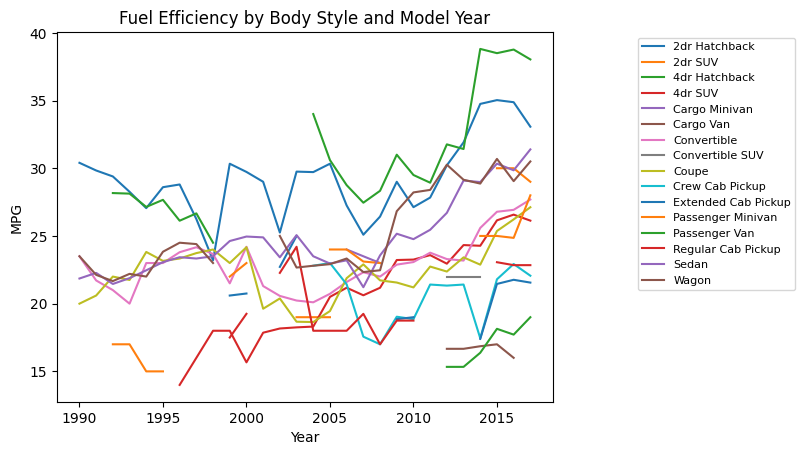

In [36]:
# Create a line chart
plt.figure(figsize=(10, 6))

pivot_table2.plot()

# Set labels and title
plt.xlabel('Year')
plt.ylabel('MPG')
plt.title('Fuel Efficiency by Body Style and Model Year')
plt.legend(loc='upper right',markerscale=0.5, fontsize=8,bbox_to_anchor=(1.5, 1))

# Display the chart
plt.show()

To Determine : How does the car's horsepower, MPG, and price vary across different Brands?


In [37]:
# Create a pivot table for the average horsepower, MPG, and MSRP by car brand
pivot_table3 = data.pivot_table(index='Make', values=['Engine HP', 'highway MPG', 'MSRP'], aggfunc='mean')

# Display the pivot table
print("Average Horsepower, MPG, and MSRP by Car Brand:")
print(pivot_table3)

scatter_df= pivot_table3.reset_index()

Average Horsepower, MPG, and MSRP by Car Brand:
                 Engine HP          MSRP  highway MPG
Make                                                 
Acura           244.963415  3.508749e+04    28.219512
Alfa Romeo      237.000000  6.160000e+04    34.000000
Aston Martin    483.758242  1.981235e+05    18.934066
Audi            280.000000  5.457412e+04    28.928349
BMW             329.620370  6.216256e+04    29.126543
Bentley         533.851351  2.471693e+05    18.905405
Bugatti        1001.000000  1.757224e+06    14.000000
Buick           228.112000  3.377040e+04    27.512000
Cadillac        332.795455  5.636827e+04    25.244949
Chevrolet       284.761513  3.597082e+04    26.276316
Chrysler        241.388889  2.997887e+04    26.620370
Dodge           295.513423  3.118680e+04    22.996644
FIAT            146.894737  2.237066e+04    34.184211
Ferrari         509.911765  2.373838e+05    15.720588
Ford            276.144330  3.363895e+04    24.793814
GMC             279.985185  3.7385

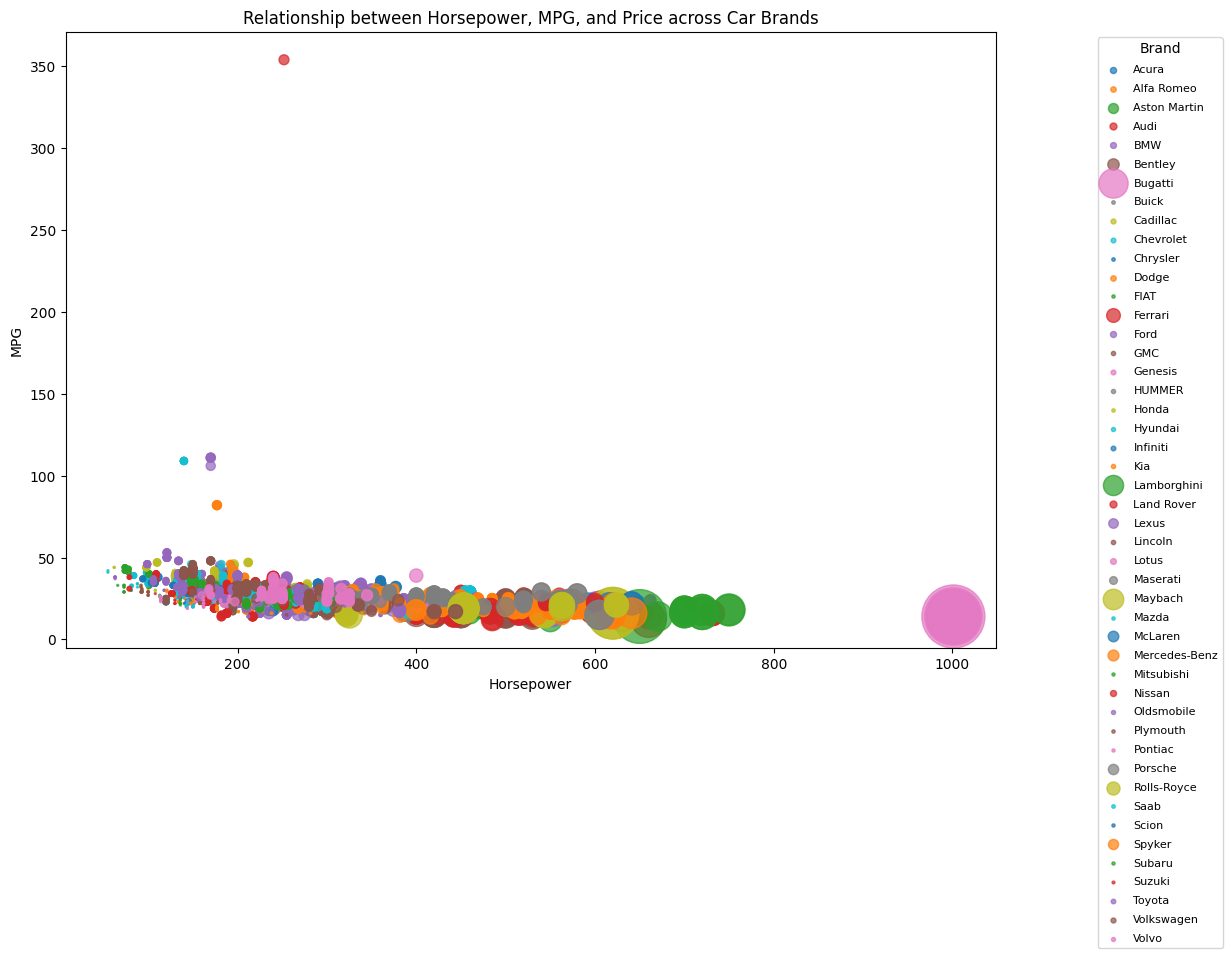

In [38]:
# Create a bubble chart
plt.figure(figsize=(12, 8))

# Iterate over each brand
for brand, group in data.groupby('Make'):
    plt.scatter(group['Engine HP'], group['highway MPG'], s=group['MSRP'] / 1000, alpha=0.7, label=brand)

# Set labels and title
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between Horsepower, MPG, and Price across Car Brands')
plt.legend()

# Adjust the size of the bubbles in the legend
handles, labels = plt.gca().get_legend_handles_labels()
sizes = [40, 80, 120]  # Adjust the sizes as per your preference
plt.legend(handles, labels, scatterpoints=1, loc='upper right', markerscale=0.5, fontsize=8, title='Brand', labelspacing=0.8, bbox_to_anchor=(1.25, 1))

# Display the chart
plt.show()